<img src='images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session D2. Network analysis: Network-level analysis and network modeling

Brockman on distance in networks (https://www.science.org/doi/abs/10.1126/science.1245200)

Facebook Small-World study

https://www.nature.com/articles/s41598-018-26951-y

Fariba's paper on perception biases

CHECK PLATT'S BOOK

...

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can ...
</div>

In [1]:
import pickle

In [2]:
with open('../data/CNS/G_cns_fb_lcc.pickle', 'rb') as f:
    G_fb = pickle.load(f)
with open('../data/CNS/MD_cns_communication_week1_lcc.pickle', 'rb') as f:
    MD_communication = pickle.load(f)
with open('../data/CNS/D_cns_communication_week1_lcc.pickle', 'rb') as f:
    D_communication = pickle.load(f)
with open('../data/CNS/MG_cns_communication_week1_lcc.pickle', 'rb') as f:
    MG_communication = pickle.load(f)
with open('../data/CNS/G_cns_communication_week1_lcc.pickle', 'rb') as f:
    G_communication = pickle.load(f)
with open('../data/CNS/MG_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
    MG_bt = pickle.load(f)
with open('../data/CNS/G_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
    G_bt = pickle.load(f)

## D2.1. Cohesion

McLevey (2022, chapter 14) on k-cliques, k-cores, components

McLevey (2022, chapter 15) on degree inequality

Ma & Seth (2020, 55–70) on cliques and components

Ma & Seth (2020, 31–42) on hubs

Menczer *et al.* (2020, chapter 2) on the Small World and (chapter 3) on hubs

centralization, average clustering coefficient, average local efficiency, global efficiency

Small World

Strength of weak ties

Scale-freeness and Matthew Effect

### D2.1.1. Connectivity

The lecture prepared the ground for cohesion analysis as the analytical process of modeling network cores. Quite generally, social networks with agents as nodes tend to weakly weighted and sparse, cultural networks with facts as nodes tend to be strongly weighted and dense. As a result, two kinds of cohesion analysis are required: graph theoretical methods and simple edge filtering. These are the two sections in this notebook.

#### Connected Components
Connected components are **maximal subgraphs** of undirected Graphs in which all node pairs are connected by **paths**:

#### Cutpoints
A cutpoint is a node whose removal will increase the number of connected components. The method is not implemented for DiGraphs:

In [3]:
def get_layer(G, layer, prune=True):
    def filter_edge(u, v, key):
        return G.has_edge(u, v, layer)
    G_subgraph = nx.subgraph_view(G=G, filter_edge=filter_edge)
    if prune:
        def filter_node(v):
            return G_subgraph.degree[v] > 0
        G_subgraph_pruned = nx.subgraph_view(G=G_subgraph, filter_node=filter_node)
        return nx.Graph(G_subgraph_pruned)
    else:
        return nx.Graph(G_subgraph)

In [4]:
import networkx as nx

In [5]:
G_bt_snapshot1 = get_layer(G=MG_bt, layer=0, prune=True)
G_bt_snapshot1_lcc = G_bt_snapshot1.subgraph(nodes=sorted(nx.connected_components(G_bt_snapshot1), key=len, reverse=True)[0])
pos_bt_snapshot1_lcc = nx.kamada_kawai_layout(G=G_bt_snapshot1_lcc, weight=None)

In [6]:
nx.articulation_points(G_bt_snapshot1_lcc)

<generator object articulation_points at 0x000001BFFB4DB6D0>

In [7]:
nodes_cut = [v for v in sorted(nx.articulation_points(G_bt_snapshot1_lcc))]

In [8]:
def highlights(G, nodes):
    d = dict(zip(G.nodes, G.number_of_nodes() * ['white']))
    for node in nodes:
        d.update({node: 'red'})
    return d

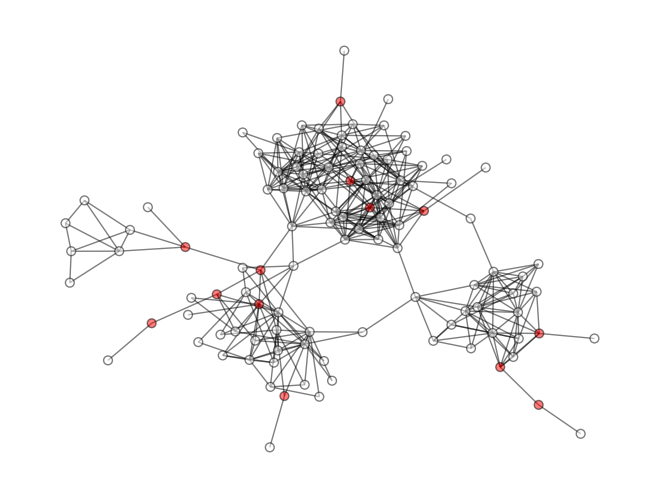

In [9]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_snapshot1_lcc, nodes=nodes_cut).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

Attack on scale-free network (Platt 82-3)

#### Minimum cuts

Platt 83

In [10]:
nx.algorithms.connectivity.minimum_st_node_cut(G=G_bt_snapshot1_lcc, s=3, t=6)

{158, 355, 546}

#### Node connectivity

Platt 84-5

In [11]:
nx.node_connectivity(G_bt_snapshot1_lcc)

1

In [12]:
nx.average_node_connectivity(G_bt_snapshot1_lcc) # takes long for large networks

2.8623853211009176

#### Bicomponents
Biconnected components or bicomponents are maximal subgraphs that cannot be disconnected by the removal of any single node. The method is not implemented for DiGraphs:

In [13]:
nx.biconnected_components(G_bt_snapshot1_lcc)

<generator object biconnected_components at 0x000001BFFDDF13C0>

In [14]:
sets_nodes_bicomp = [c for c in sorted(nx.biconnected_components(G_bt_snapshot1_lcc), key=len, reverse=True)]

Largest bicomponent:

In [15]:
nodes_lbicomp = max(nx.biconnected_components(G_bt_snapshot1_lcc), key=len) # or:
nodes_lbicomp = sets_nodes_bicomp[0]

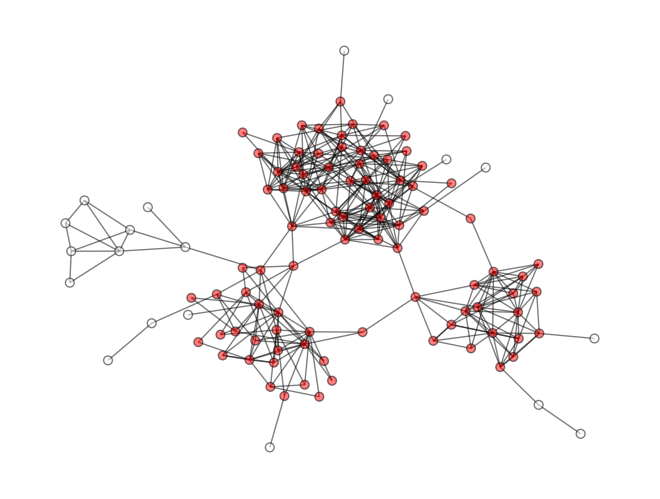

In [16]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_snapshot1_lcc, nodes=nodes_lbicomp).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

#### k-components
$k$-components are maximal subgraphs that cannot be disconnected by the removal of by the removal of any $k$ nodes. Bicomponents are the special case for $k=2$. The method may identify multiple overlapping $k$-components with similar connectivity $k$. It is not implemented for DiGraphs:

In [17]:
#nx.k_components(G_bt_snapshot1_lcc)

In [18]:
k = 3

sets_nodes_kcomp = [c for c in sorted(nx.k_components(G_bt_snapshot1_lcc)[k], key=len, reverse=True)]

Largest k-component:

In [19]:
nodes_lkcomp = sets_nodes_kcomp[0]

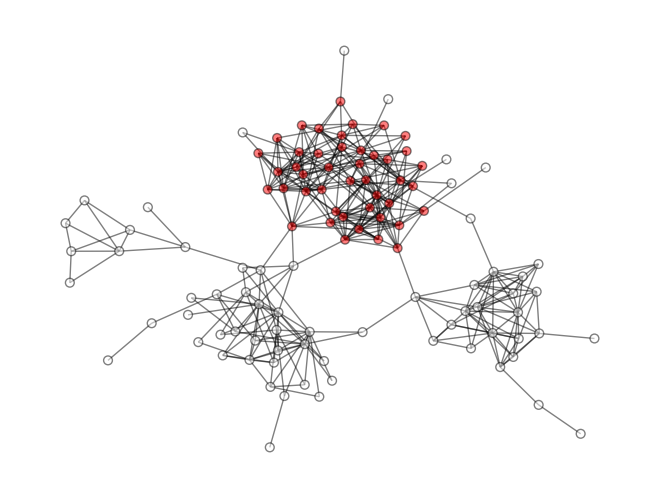

In [20]:
nx.draw(
    G = G_bt_snapshot1_lcc, 
    pos = pos_bt_snapshot1_lcc, 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_snapshot1_lcc, nodes=nodes_lkcomp).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

### D2.1.2. Assortativity and homophily

In [21]:
nx.degree_assortativity_coefficient(G_fb)

0.18241178995485915

Homophily analysis as cohesion

Size-corrected measure from Fariba?

The sex categories are 0: male; 1: female; 2: unknown.

In [22]:
nx.attribute_assortativity_coefficient(G=G_fb, attribute='sex')

0.10500672990329468

In [23]:
nx.attribute_mixing_matrix(G=G_fb, attribute='sex', normalized=False)

array([[6370., 2095.,  375.],
       [2095., 1148.,  138.],
       [ 375.,  138.,  102.]])

In [24]:
import numpy as np
from collections import Counter

In [25]:
def attribute_density_matrix(G, attribute):
    l = [data[attribute] for v, data in G.nodes(data=True)]
    counts = list(Counter(l).values())
    a = np.empty(shape=(len(counts), len(counts)))
    for i in range(len(counts)):
        for j in range(len(counts)):
            if i == j:
                a[i, j] = counts[i] * (counts[j] - 1)
            else:
                a[i, j] = counts[i] * counts[j]
    return nx.attribute_mixing_matrix(G=G, attribute=attribute, normalized=False) / a

In [26]:
p_fb_sex = attribute_density_matrix(G=G_fb, attribute='sex').round(4)
p_fb_sex

array([[0.0189, 0.0217, 0.0122],
       [0.0217, 0.0419, 0.0157],
       [0.0122, 0.0157, 0.037 ]])

In [27]:
p_fb = nx.density(G_fb)
p_fb

0.020081351689612014

In [28]:
(p_fb_sex / p_fb).round(2)

array([[0.94, 1.08, 0.61],
       [1.08, 2.09, 0.78],
       [0.61, 0.78, 1.84]])

### D2.2. Distance and Search

Platt ch6

Small-World paradigm

In [29]:
# number of nodes
n_fb = G_fb.number_of_nodes()
n_communication = G_communication.number_of_nodes()
n_bt = G_bt.number_of_nodes()

In [30]:
# number of edges
m_fb = G_fb.number_of_edges()
m_communication = G_communication.number_of_edges()
m_bt = G_bt.number_of_edges()

In [31]:
# density
p_fb = nx.density(G_fb)
p_communication = nx.density(G_communication)
p_bt = nx.density(G_bt)

In [32]:
# average clustering coefficient
c_fb = nx.average_clustering(G_fb)
c_communication = nx.average_clustering(G_communication)
c_bt = nx.average_clustering(G_bt)

In [33]:
# average shortest path length
l_fb = nx.average_shortest_path_length(G_fb)
l_communication = nx.average_shortest_path_length(G_communication)
l_bt = nx.average_shortest_path_length(G_bt)

In [34]:
import pandas as pd

In [35]:
stats = pd.DataFrame(index=['Facebook friendship', 'Text messages & phone calls', 'Face-to-face interaction'])
stats['n'] = [n_fb, n_communication, n_bt]
stats['m'] = [m_fb, m_communication, m_bt]
stats['p'] = [p_fb, p_communication, p_bt]
stats['c'] = [c_fb, c_communication, c_bt]
stats['l'] = [l_fb, l_communication, l_bt]
stats[['p', 'c', 'l']] = stats[['p', 'c', 'l']].round(2)
stats

,n,m,p,c,l
Facebook friendship,800,6418,0.02,0.32,2.98
Text messages & phone calls,194,215,0.01,0.10,9.99
Face-to-face interaction,384,1936,0.03,0.40,3.66


What is a random graph? Erdos Renyi? Why do we care to compare the empirical graph to random graph? The point behind is to see if our empirical graph has unique features to observe than the random graphs.

In [36]:
G_fb_random = nx.erdos_renyi_graph(n=n_fb, p=p_fb, seed=42)
G_communication_random = nx.erdos_renyi_graph(n=n_communication, p=p_communication, seed=42)
MG_bt_random = nx.erdos_renyi_graph(n=n_bt, p=p_bt, seed=42)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

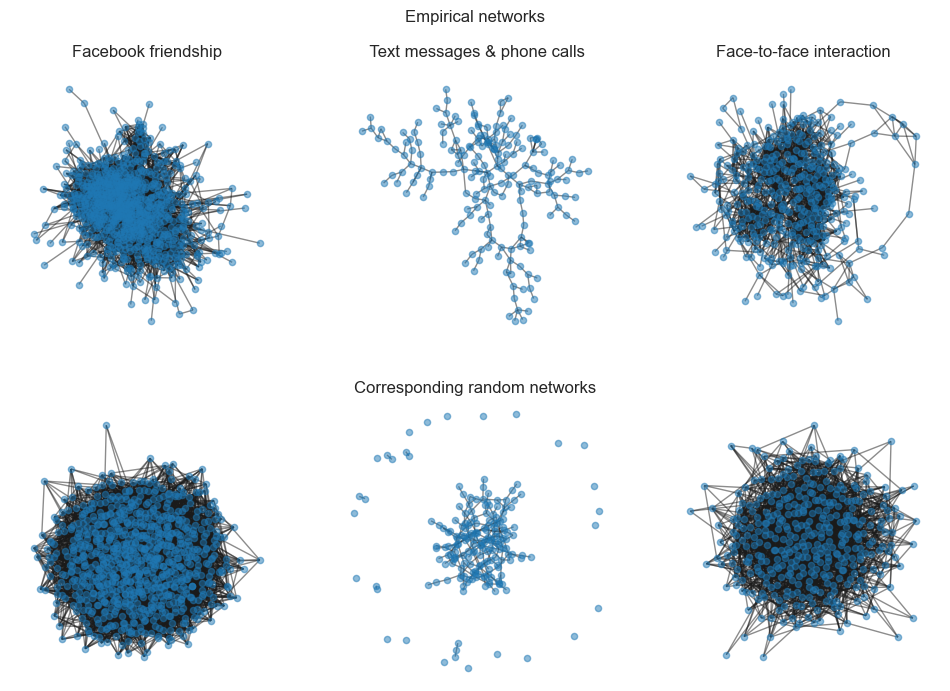

In [38]:
empirical = [G_fb, G_communication, G_bt]
titles_empirical = ['Facebook friendship', 'Empirical networks\n\n Text messages & phone calls', 'Face-to-face interaction']
random = [G_fb_random, G_communication_random, MG_bt_random]
titles_random = ['', 'Corresponding random networks', '']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(3):
    axs[0, i].set_title(titles_empirical[i])
    nx.draw(
        G = empirical[i], 
        pos = nx.get_node_attributes(G=empirical[i], name='pos'), 
        ax = axs[0, i], 
        node_size = 20, 
        alpha = .5
    )
for i in range(3):
    axs[1, i].set_title(titles_random[i])
    nx.draw(
        G = random[i], 
        ax = axs[1, i], 
        node_size = 20, 
        alpha = .5
    )

Normalized values calculations

In [39]:
(np.log(n_fb) - .57722) / np.log(2 * m_fb / n_fb) + .5

2.700546849146907

In [40]:
l_fb_random = (np.log(n_fb) - .57722) / np.log(2 * m_fb / n_fb) + .5
l_communication_random = (np.log(n_communication) - .57722) / np.log(2 * m_communication / n_communication) + .5
l_bt_random = (np.log(n_bt) - .57722) / np.log(2 * m_bt / n_bt) + .5

In [41]:
stats['l_random'] = [l_fb_random, l_communication_random, l_bt_random]
stats['c_norm'] = stats['c'] / stats['p']
stats['l_norm'] = stats['l'] / stats['l_random']
stats['q'] = stats['c_norm'] / stats['l_norm']
stats[['l_random', 'c_norm', 'l_norm', 'q']] = stats[['l_random', 'c_norm', 'l_norm', 'q']].round(2)

In [42]:
stats

,n,m,p,c,l,l_random,c_norm,l_norm,q
Facebook friendship,800,6418,0.02,0.32,2.98,2.70,16.00,1.10,14.50
Text messages & phone calls,194,215,0.01,0.10,9.99,6.39,10.00,1.56,6.40
Face-to-face interaction,384,1936,0.03,0.40,3.66,2.83,13.33,1.30,10.29


### D2.3. Inequality and hierarchy

What is inequality? How we can measure it in social networks? Why do we need entropy?

Scale-free network paradigm

In [43]:
nodelist_fb = pd.DataFrame(index=G_fb.nodes())

In [44]:
nodelist_fb['degree'] = [k for v, k in G_fb.degree()]

In [45]:
import powerlaw

In [46]:
fit_degree_fb = powerlaw.Fit(data=nodelist_fb['degree'], xmin=1)

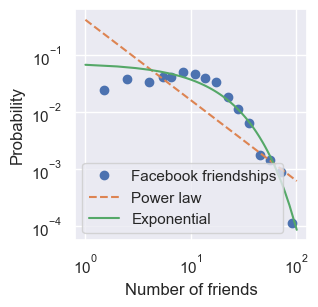

In [47]:
plt.figure(figsize=[3, 3])
fig = fit_degree_fb.plot_pdf(marker='o', linestyle='', label='Facebook friendships')
fit_degree_fb.power_law.plot_pdf(linestyle='--', label='Power law')
fit_degree_fb.exponential.plot_pdf(linestyle='-', label='Exponential')
plt.legend()
plt.xlabel('Number of friends')
plt.ylabel('Probability')
plt.show()

In [48]:
from scipy.stats import entropy

In [49]:
# centralization
# Platt 85
1 - entropy(pk=nodelist_fb['degree']) / np.log(len(nodelist_fb['degree']))

0.04286716024454429

#### Hierarchical modularity

In [50]:
nodelist_fb['log_degree'] = np.log10(nodelist_fb['degree'])
nodelist_fb['clustering'] = list(nx.clustering(G_fb).values())
nodelist_fb['log_clustering'] = np.log10(nodelist_fb['clustering'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


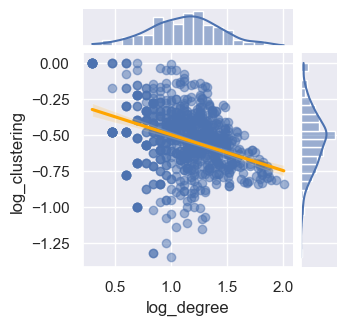

In [51]:
plot = sns.jointplot(
    data = nodelist_fb[nodelist_fb['clustering'] > 0], 
    x = 'log_degree', 
    y = 'log_clustering', 
    kind = 'reg', 
    joint_kws={'scatter_kws':{'alpha': .5}, 'line_kws':{'color': 'orange'}}
)
plot.fig.set_figwidth(3)
plot.fig.set_figheight(3)

#### Flow hierarchy

In [52]:
nx.flow_hierarchy(D_communication)

0.13008130081300817

### D2.4. Network modeling

#### Stochastic Blockmodel

In [53]:
sizes_sbm = list(Counter([data['sex'] for v, data in G_fb.nodes(data=True)]).values())
sizes_sbm

[581, 166, 53]

In [54]:
node_attr_sbm = list(np.repeat(range(len(sizes_sbm)), sizes_sbm))

In [55]:
G_sbm = nx.stochastic_block_model(sizes=sizes_sbm, p=p_fb_sex, seed=42)

To avoid that red nodes are always on top of blue nodes:

In [56]:
new_labels = list(range(G_sbm.number_of_nodes()))
old_labels = new_labels.copy()
np.random.shuffle(new_labels)
mapping = dict(zip(old_labels, new_labels))

G_sbm = nx.relabel_nodes(G_sbm, mapping)
node_attr_sbm = [x for _, x in sorted(zip(new_labels, node_attr_sbm))]

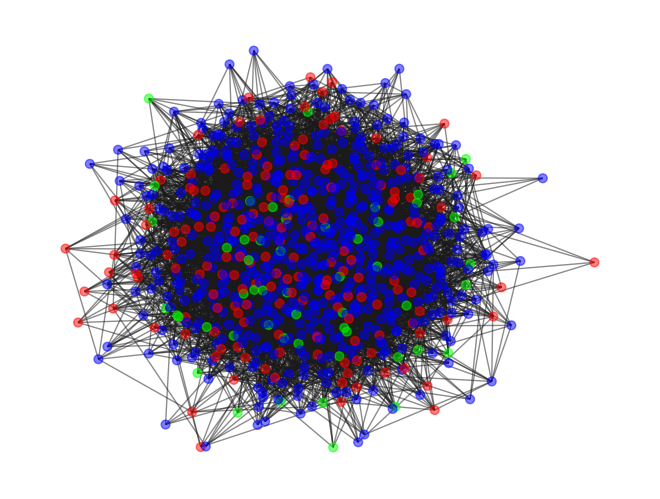

In [57]:
nx.draw(
    G = G_sbm, 
    node_size = 40, 
    node_color = node_attr_sbm, 
    alpha = .5, 
    cmap = plt.cm.brg
)

`G_fb_sbm` is an improvement of `G_fb_random`: it exhibts the correct attribute mixing pattern.

#### Watts-Strogatz model

In [58]:
degree_ring = 0
k = 2
while np.mean(degree_ring) < np.mean(nodelist_fb['degree']):
    G_ring = nx.watts_strogatz_graph(n=G_fb.number_of_nodes(), k=k, p=0.)
    degree_ring = [k for v, k in G_ring.degree()]
    k += 1
print('Each node is joined with its %.f nearest neighbors in a ring topology.' %k)

Each node is joined with its 19 nearest neighbors in a ring topology.


In [59]:
nx.density(G=G_fb)

0.020081351689612014

In [60]:
nx.density(G=G_ring)

0.02252816020025031

In [61]:
c_fb

0.3153509697401216

In [62]:
np.mean(list(nx.clustering(G_ring).values()))

0.7058823529411765

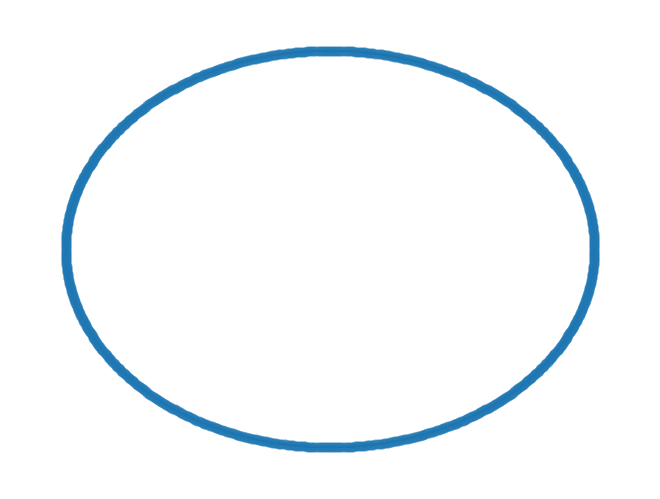

In [63]:
nx.draw(
    G = G_ring, 
    pos = nx.circular_layout(G=G_ring), 
    node_size = 40, 
    alpha = .5
)

In [64]:
l_ws = 800
p = 0.
while l_ws > l_fb:
    G_ws = nx.watts_strogatz_graph(n=G_fb.number_of_nodes(), k=19, p=p)
    l_ws = nx.average_shortest_path_length(G=G_ws)
    p += .01
print('The probability of rewiring each edge is %.2f.' %p)

The probability of rewiring each edge is 0.20.


In [65]:
nx.average_clustering(G_ws)

0.37586865046026996

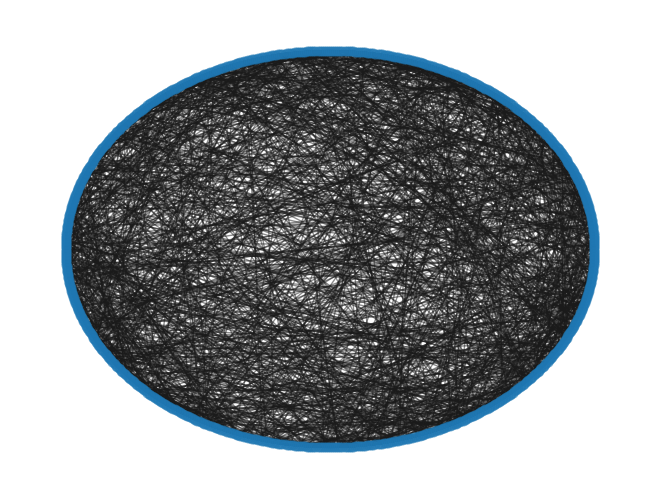

In [66]:
nx.draw(
    G = G_ws, 
    pos = nx.circular_layout(G_ws), 
    node_size = 40, 
    alpha = .5
)

In [67]:
#nx.draw(
#    G = G_ws, 
#    node_size = 40, 
#    alpha = .5
#)

#### Barabási-Albert model

In [68]:
p_ba = 0
m = 1
while p_ba < p_fb:
    G_ba = nx.barabasi_albert_graph(n=G_fb.number_of_nodes(), m=m)
    p_ba = nx.density(G=G_ba)
    m += 1

In [69]:
nx.density(G_fb)

0.020081351689612014

In [70]:
nx.density(G_ba)

0.0222747183979975

In [71]:
nodelist_fb['degree'].mean()

16.045

In [72]:
degree_ba = [k for v, k in G_ba.degree()]

In [73]:
np.mean(degree_ba)

17.7975

In [74]:
fit_degree_ba = powerlaw.Fit(data=degree_ba, xmin=1)

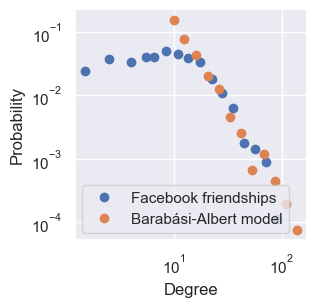

In [75]:
plt.figure(figsize=[3, 3])
fig = fit_degree_fb.plot_pdf(marker='o', linestyle='', label='Facebook friendships')
fit_degree_ba.plot_pdf(marker='o', linestyle='', label='Barabási-Albert model')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()

In [76]:
#nx.draw(
#    G = G_ba, 
#    node_size = degree_ba, 
#    alpha = .5
#)

#### Model overview

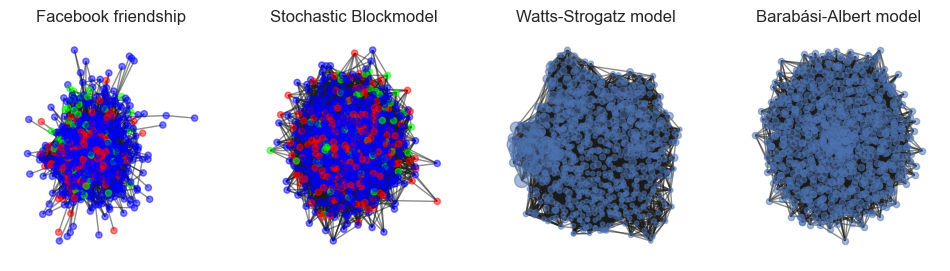

In [77]:
networks = [G_fb, G_sbm, G_ws, G_ba]
node_sizes = [20, 20, degree_ba, 20]
node_colors = [[data['sex'] for v, data in G_fb.nodes(data=True)], node_attr_sbm, None, None]
titles = ['Facebook friendship', 'Stochastic Blockmodel', 'Watts-Strogatz model', 'Barabási-Albert model']

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        ax = axs[i], 
        node_size = node_sizes[i], 
        node_color = node_colors[i], 
        alpha = .5, 
        cmap = plt.cm.brg
    )

## D2.5. Hashtag co-occurrence network analysis

#### Small-World analysis

In [78]:
hashtags = pd.read_csv('../data/TweetsCOV19/TweetsCOV19_tables/hashtags.tsv.gz', sep='\t', index_col=None, encoding='utf-8')
hashtag_cooccurrences = pd.read_csv('../data/TweetsCOV19/hashtag_cooccurrences.tsv.gz', sep='\t', index_col=None, encoding='utf-8')

In [79]:
hashtags['tweets_norm'] = hashtag_cooccurrences[hashtag_cooccurrences['hashtag_idx_i'] == hashtag_cooccurrences['hashtag_idx_j']].reset_index(drop=True)['cooccurrence_norm']
hashtag_cooccurrences = hashtag_cooccurrences[hashtag_cooccurrences['hashtag_idx_i'] != hashtag_cooccurrences['hashtag_idx_j']].reset_index(drop=True)

In [80]:
G_hashtag_cooccurrences = nx.from_pandas_edgelist(
    df = hashtag_cooccurrences, 
    source = 'hashtag_idx_i', 
    target = 'hashtag_idx_j', 
    #edge_attr = ['cooccurrence', 'cooccurrence_norm'], 
    create_using = nx.Graph
)

In [81]:
G_hashtag_cooccurrences_lcc = G_hashtag_cooccurrences.subgraph(sorted(nx.connected_components(G_hashtag_cooccurrences), key=len, reverse=True)[0])

In [82]:
# add figure of network drawn in graph-tool

In [83]:
n_hashtags = G_hashtag_cooccurrences_lcc.number_of_nodes()
m_hashtags = G_hashtag_cooccurrences_lcc.number_of_edges()
p_hashtags = nx.density(G=G_hashtag_cooccurrences_lcc)
c_hashtags = 0.75261451
l_hashtags = 3.27701117
l_hashtags_random = (np.log(n_hashtags) - .57722) / np.log(2 * m_hashtags / n_hashtags) + .5
c_hashtags_norm = c_hashtags / p_hashtags
l_hashtags_norm = l_hashtags / l_hashtags_random
q_hashtags = c_hashtags_norm / l_hashtags_norm

In [84]:
stats.loc['Hashtag co-occurrences'] = [
    n_hashtags, 
    m_hashtags, 
    p_hashtags, 
    c_hashtags, 
    l_hashtags, 
    l_hashtags_random, 
    c_hashtags_norm, 
    l_hashtags_norm, 
    q_hashtags
]
stats[['n', 'm']] = stats[['n', 'm']].astype(int)
stats[['p']] = stats[['p']].round(5)
stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']] = stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']].round(2)

In [85]:
stats

,n,m,p,c,l,l_random,c_norm,l_norm,q
Facebook friendship,800,6418,0.02000,0.32,2.98,2.70,16.00,1.10,14.50
Text messages & phone calls,194,215,0.01000,0.10,9.99,6.39,10.00,1.56,6.40
Face-to-face interaction,384,1936,0.03000,0.40,3.66,2.83,13.33,1.30,10.29
Hashtag co-occurrences,226436,1864812,0.00007,0.75,3.28,4.70,10346.57,0.70,14823.94


In [86]:
#c_hashtags = nx.average_clustering(G=G_hashtag_cooccurrences_lcc) # takes about 1 hour

In [87]:
#l_hashtags = nx.average_shortest_path_length(G=G_hashtag_cooccurrences_lcc) # takes very long

BOX

NX
...

GT
10sec (computing c)
13min (computing l)
36min (processing l property map)

#### Scale-free analysis

In [88]:
fit_tweets_norm = powerlaw.Fit(data=hashtags['tweets_norm'], xmin=2)

In [89]:
fit_tweets_norm.alpha

2.005606918415123

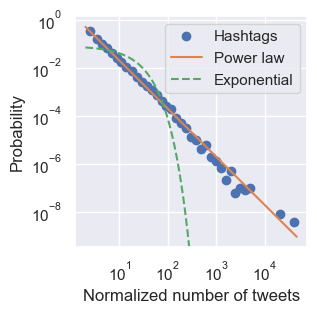

In [90]:
plt.figure(figsize=[3, 3])
fig = fit_tweets_norm.plot_pdf(marker='o', linestyle='', label='Hashtags')
fit_tweets_norm.power_law.plot_pdf(linestyle='-', label='Power law')
fit_tweets_norm.exponential.plot_pdf(linestyle='--', label='Exponential')
plt.ylim(3.29e-10, 1.38)
plt.legend()
plt.xlabel('Normalized number of tweets')
plt.ylabel('Probability')
plt.show()

In [91]:
#centralization
1 - entropy(pk=hashtags['tweets_norm']) / np.log(len(hashtags['tweets_norm']))

0.261849428075824

In [92]:
#nx.degree_assortativity_coefficient(G=G_hashtag_cooccurrences_lcc) # takes long -- how long?

#### Core detection by filtering co-selections
This method does not take the structure of relations into account. Cores are identified simply by **removing weakly weighted edges**. For the purpose of demonstrating this, we will work with the Social Network Science dataset and the use of scholarly languagein that field:

In [93]:
hashtags = hashtags.reset_index().sort_values(by='tweets_norm', ascending=False)
hashtags['cum_attention'] = (hashtags['tweets_norm'] / hashtags['tweets_norm'].sum()).cumsum()
hashtags = pd.merge(
    left = hashtags[['index', 'hashtag', 'tweets', 'tweets_norm']], 
    right = hashtags[['tweets_norm', 'cum_attention']].groupby(by='tweets_norm').max(), 
    on = 'tweets_norm'
).sort_values(by='index', ascending=True).set_index(keys='index')
hashtags.index.name = None
hashtags

,hashtag,tweets,tweets_norm,cum_attention
0,covid19,86656,45937.6282,0.081022
1,coronavirus,40111,18312.8267,0.113322
2,covid_19,12570,5343.1000,0.122745
3,lockdown,12056,4538.2368,0.138920
4,stayhome,11508,4021.3275,0.153546
...,...,...,...,...
281291,🥒,1,0.0526,0.999806
281292,🥚,1,0.0526,0.999806
281293,🦇❤️,1,0.1667,0.989568
281294,🦠,1,0.1000,0.996721


In [94]:
hashtag_cooccurrences = hashtag_cooccurrences.sort_values(by='cooccurrence_norm', ascending=False)
hashtag_cooccurrences['cum_attention'] = (hashtag_cooccurrences['cooccurrence_norm'] / hashtag_cooccurrences['cooccurrence_norm'].sum()).cumsum()
hashtag_cooccurrences = pd.merge(
    left = hashtag_cooccurrences[['hashtag_idx_i', 'hashtag_idx_j', 'cooccurrence', 'cooccurrence_norm']], 
    right = hashtag_cooccurrences[['cooccurrence_norm', 'cum_attention']].groupby(by='cooccurrence_norm').max().reset_index(), 
    on = 'cooccurrence_norm'
)
hashtag_cooccurrences

,hashtag_idx_i,hashtag_idx_j,cooccurrence,cooccurrence_norm,cum_attention
0,0,1,11642,2956.0353,0.006616
1,4,6,2363,513.8860,0.007766
2,1,2,2341,426.2425,0.008720
3,0,3,1830,422.5268,0.009666
4,0,4,1506,318.7245,0.010379
...,...,...,...,...,...
1887199,2409,3057,1,0.0294,1.000000
1887200,795,24276,1,0.0294,1.000000
1887201,670,8845,1,0.0294,1.000000
1887202,4008,12988,1,0.0294,1.000000


Filter network to the core corresponding to the top 10% of the attention:

In [95]:
hashtag_cooccurrences_attention = hashtag_cooccurrences[hashtag_cooccurrences['cum_attention'] <= .1]

In [96]:
#hashtags = hashtags.sort_values(by='cum_attention', ascending=False)
#hashtag_cooccurrences_attention = hashtag_cooccurrences_attention.sort_values(by='cum_attention', ascending=False)

In [97]:
def get_attr_values(df, type_of_list, attr, node='name', source='name_u', target='name_v'):
    '''
    Transforms one or multiple columns of a nodelist or edgelist into a dictionary that can be used to set the node or edge attributes of a graph.
    
    Parameters:
        df : Pandas DataFrame
            Nodelist or edgelist that contains the node or edge attributes.
        type_of_list : String, either 'nodes' or 'edges'
            To specify if attribute values should be created for nodes or edges.
        attr : List
            List containing the names of the columns in df that contain the attribute values.
        name : String, only required if df is a 'nodes' type_of_list, default 'name'
            Column name of the nodelist containing the node labels.
        source : String, only required if df is an 'edges' type_of_list, default 'name_u'
            Column name of the edgelist containing the source node labels.
        target : String, only required if df is an 'edges' type_of_list, default 'name_v'
            Column name of the edgelist containing the target node labels.
    
    Returns:
        Dictionary with nodes or edges as keys and an attribute dictionary as values.
    '''
    df_ = df.copy()
    df_ = pd.DataFrame([df_[attr].to_dict('records')]).T
    if type_of_list == 'nodes':
        df_.index = df[node]
    if type_of_list == 'edges':
        df_.index = list(zip(df[source], df[target]))
    return list(df_.to_dict().values())[0]

In [98]:
G_hashtag_cooccurrences_core = nx.from_pandas_edgelist(
    df = hashtag_cooccurrences_attention, 
    source = 'hashtag_idx_i', 
    target = 'hashtag_idx_j', 
    edge_attr = ['cooccurrence', 'cooccurrence_norm'], 
    create_using = nx.Graph
)
#G_hashtag_cooccurrences_core.add_nodes_from(hashtags.index)
node_attr_hashtags = get_attr_values(df=hashtags.reset_index(), type_of_list='nodes', attr=['hashtag', 'tweets', 'tweets_norm'], node='index')
nx.set_node_attributes(G=G_hashtag_cooccurrences_core, values=node_attr_hashtags)

In [99]:
l_cc = sorted(nx.connected_components(G_hashtag_cooccurrences_core), key=len, reverse=True)
G_hashtag_cooccurrences_core_lcc = G_hashtag_cooccurrences_core.subgraph(l_cc[0])

In [100]:
pos_hashtag_cooccurrences_core_lcc_spring = nx.spring_layout(
    G = G_hashtag_cooccurrences_core_lcc, 
    weight = 'weight'
)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


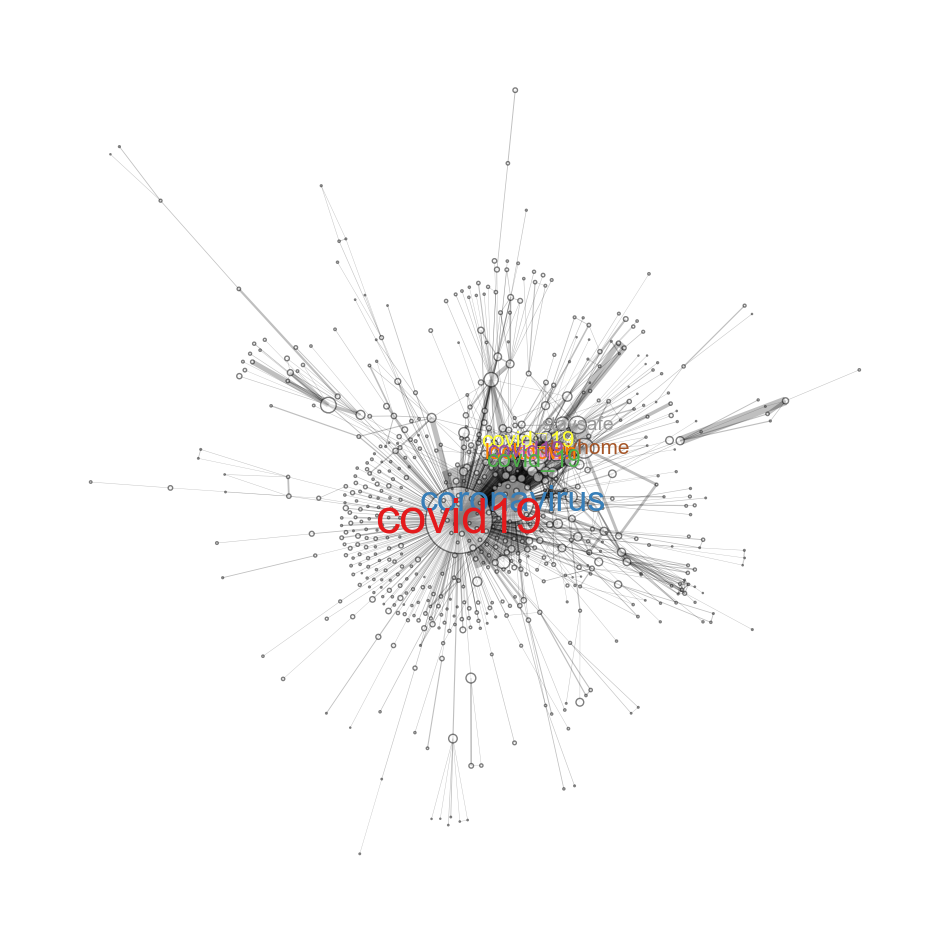

In [101]:
number_of_labels = 9 # G_hashtag_cooccurrences_core_lcc.number_of_nodes()

plt.figure(figsize=[12, 12])
nx.draw_networkx_nodes(
    G = G_hashtag_cooccurrences_core_lcc, 
    pos = pos_hashtag_cooccurrences_core_lcc_spring, 
    node_size = [node_size/20 for node_size in list(nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='tweets_norm').values())], 
    node_color = 'white', 
    alpha = .5, 
    linewidths = 1., 
    edgecolors = 'black'
)
nx.draw_networkx_edges(
    G = G_hashtag_cooccurrences_core_lcc, 
    pos = pos_hashtag_cooccurrences_core_lcc_spring, 
    width = [width/40 for width in list(nx.get_edge_attributes(G=G_hashtag_cooccurrences_core_lcc, name='cooccurrence_norm').values())], 
    edge_color = 'black', 
    alpha = .25, 
    node_size = [node_size/20 for node_size in list(nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='tweets_norm').values())]
)
nodes = hashtags.sort_values(by='tweets_norm', ascending=False).index.intersection(G_hashtag_cooccurrences_core_lcc.nodes())[:number_of_labels]
for i in reversed(range(number_of_labels)):
    nx.draw_networkx_labels(
        G = G_hashtag_cooccurrences_core_lcc, 
        pos = pos_hashtag_cooccurrences_core_lcc_spring, 
        labels = {nodes[i]: nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='hashtag')[nodes[i]]}, 
        font_size = int(nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='tweets_norm')[nodes[i]]**(1/3)), 
        font_color = plt.cm.Set1(i/number_of_labels), 
        alpha = 1.
    )
plt.box(False)

## Commented references

### Recommended textbooks and NetworkX resources

Ma, E. & Seth, M. (2022). *Network Analysis Made Simple*. LeanPub. https://leanpub.com/nams. *An easy, well-maintained, and self-explanatory resource for NetworkX self-education that hides the inner workings of algorithms in custom functions. Use the [website](https://ericmjl.github.io/Network-Analysis-Made-Simple/) as a guide to Jupyter Notebooks on constructing, importing, exporting, and analyzing networks. You can also launch a binder session to execute notebooks in the cloud.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises.*

Platt, E. L. (2019). *Network Science with Python and NetworkX Quick Start Guide*. Packt. https://www.packtpub.com/product/network-science-with-python-and-networkx-quick-start-guide/9781789955316. *Systematic introduction to the practice of network preprocessing and analysis. Have a look at chapters 1–4 and 10–11 for the focus of session 2 here. All Jupyter Notebooks are publically available on the [website](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).*

### Advanced textbooks

Artime, O., Benigni, B., Bertagnolli, G., d'Andrea, V., Gallotti, R., Ghavasieh, A., Raimondo, S., & De Domenico, M. (2022). *Multilayer Network Science*. Cambridge University Press. https://doi.org/10.1017/9781009085809. *Interdisciplinary state-of-the-art account of the topic, quite advanced and mathematical.*

Caldarelli, G. & Chessa, A. (2016). *Data Science and Complex Networks: Real Case Studies with Python*. Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199639601.001.0001. *Interdisciplinary display of case studies from the physics/complexity perspective. Jupyter Notebooks that use NetworkX but add many custom functions are available on the [website](https://github.com/datascienceandcomplexnetworks).*

### Other cited references

Breiger, R. L. (1974). "The duality of persons and groups". *Social Forces* 53:181–190. https://doi.org/10.1093/sf/53.2.181. *A fundamental paper about the sociological use of bipartite network structures.*

Freeman, L. (2004). *The Development of Social Network Analysis: A Study in the Sociology of Science*. Empirical Press. *The history of the field of Social Network Analysis as told by one of its founders.*

Fuhse, J. (2021). *Social Networks of Meaning and Communication*. Oxford University Press. https://doi.org/10.1093/oso/9780190275433.001.0001. *Accessible account of sociological network theory that delves deep into the mutual constitution of social networks and communication networks.*

Krempel, L. (2014). "Network visualization". In: Scott, J. & Carrington, P. J. (Eds.), *The SAGE Handbook of Social Network Analysis* (pp. 558-577). Sage. https://doi.org/10.4135/9781446294413. *A systematic overview how to visualize rich network information.*

Lee, M. & Martin, J. L. (2018). "Doorway to the dharma of duality". *Poetics* 68:18–30. https://doi.org/10.1016/j.poetic.2018.01.001. *A methodological account of socio-cultural analysis using publication data.*

Lietz, H., Schmitz, A., & Schaible, J. (2021). "Social Network Analysis with Digital Behavioral Data". *easy_social_sciences* 66:41–48. https://doi.org/10.15464/easy.2021.005. *A short and easily accessible introduction to the topic.*

Peixoto, T. P. (2015). "Inferring the mesoscale structure of layered, edge-valued, and time-varying networks". *Physical Review E* 92:042807. https://doi.org/10.1103/PhysRevE.92.042807. *Advanced stochastic analysis of various multilayer networks written in physics style.*

Sekara, V., Stopczynski, A., & Lehmann, S. (2016). "Fundamental structures of dynamic social networks". *Proceedings of the National Academy of Sciences* 113:9977–9982. https://doi.org/10.1073/pnas.1602803113. *Insightful multilayer analysis of the Copenhagen Networks Study interaction dataset.*

Sapiezynski, P., Stopczynski, A., Lassen, D. D., & Lehmann, S. (2019). "Interaction data from the Copenhagen Networks Study". *Scientific Data* 6:315 (2019). https://doi.org/10.1038/s41597-019-0325-x. *Description of one of the richest publicly available multilayer network datasets.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz & Haiko Lietz & N. Gizem Bacaksizlar Turbic

Version date: 28. January 2023

License: ...
</div>

#### Notes to be removed before publication

- ...